In [52]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import missingno as msno

In [35]:
players_data = pd.read_excel('NCAA_to_NBA.xlsx')

In [36]:
players_data.head()

,Unnamed: 0,Pick,Name,Year,Games Played,Minutes Per Game,FGs per game,Three point attempts,Threes per game,Free Throws per game,Rebounds per game,Assists per game,Steals per game,Blocks per game,Turnovers per game,Points per game,Position,NBA Success?
0,0,1,Karl-Anthony Towns,2015,39,21.1,0.566,0.2,0.250,0.813,6.7,1.1,0.5,2.3,1.4,10.3,Forward,yes
1,1,3,Jahlil Okafor,2015,38,30.1,0.664,0.0,NaN,0.510,8.5,1.3,0.8,1.4,2.5,17.3,Center,no
2,2,6,Willie Cauley-Stein,2015,105,24.5,0.593,0.0,NaN,0.508,6.2,0.9,1.1,2.2,1.2,8.0,Forward,no
3,3,8,Stanley Johnson,2015,38,28.4,0.446,3.1,0.371,0.742,6.5,1.7,1.5,0.4,2.2,13.8,Forward,no
4,4,9,Frank Kaminsky,2015,144,20.4,0.522,1.9,0.369,0.763,4.6,1.3,0.5,1.1,0.8,10.1,Center,no


In [24]:
players_data.tail()

,Pick,Name,Year,Games Played,Minutes Per Game,FGs per game,Three point attempts,Threes per game,Free Throws per game,Rebounds per game,Assists per game,Steals per game,Blocks per game,Turnovers per game,Points per game,Position,NBA Success?
830,12,Vitaly Potapenko,1996,56,30.5,0.603,0.1,0.167,0.725,6.9,1.4,0.5,1.0,4.2,19.9,Center,no
831,15,Steve Nash,1996,113,30.1,0.430,5.8,0.401,0.867,3.1,4.5,1.3,0.1,3.1,14.9,Guard,no
832,16,Tony Delk,1996,133,23.7,0.474,5.4,0.397,0.709,3.5,1.6,1.5,0.3,1.5,14.2,Guard,no
833,18,John Wallace,1996,127,33.0,0.533,0.8,0.390,0.738,8.4,2.0,1.1,1.6,3.1,16.7,Forward,no
834,19,Walter McCarty,1996,103,20.5,0.515,1.8,0.401,0.684,5.1,1.8,0.9,1.0,1.8,9.2,Forward,no


In [45]:
players_data=players_data.drop(['Unnamed: 0'],axis=1)

In [46]:
players_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 17 columns):
Pick                    835 non-null int64
Name                    835 non-null object
Year                    835 non-null int64
Games Played            835 non-null int64
Minutes Per Game        799 non-null float64
FGs per game            835 non-null float64
Three point attempts    825 non-null float64
Threes per game         764 non-null float64
Free Throws per game    834 non-null float64
Rebounds per game       835 non-null float64
Assists per game        834 non-null float64
Steals per game         832 non-null float64
Blocks per game         832 non-null float64
Turnovers per game      802 non-null float64
Points per game         835 non-null float64
Position                808 non-null object
NBA Success?            834 non-null object
dtypes: float64(11), int64(3), object(3)
memory usage: 111.0+ KB


In [47]:
players_data['Name'].astype('category')

0           Karl-Anthony Towns
1                Jahlil Okafor
2          Willie Cauley-Stein
3              Stanley Johnson
4               Frank Kaminsky
5              Justise Winslow
6                 Myles Turner
7                   Trey Lyles
8                 Devin Booker
9                Cameron Payne
10                 Kelly Oubre
11                Terry Rozier
12               Rashad Vaughn
13                  Sam Dekker
14                Jerian Grant
15                Delon Wright
16             Justin Anderson
17                Bobby Portis
18     Rondae Hollis-Jefferson
19                  Tyus Jones
20               Jarell Martin
21                 Larry Nance
22            Chris McCullough
23                Kevon Looney
24            Montrezl Harrell
25               Jordan Mickey
26               Anthony Brown
27            Rakeem Christmas
28              Richaun Holmes
29             Darrun Hilliard
                ...           
805           Jerald Honeycutt
806     

In [48]:
players_data['NBA Success?'].astype('category')

0      yes
1       no
2       no
3       no
4       no
5       no
6       no
7       no
8       no
9       no
10      no
11      no
12      no
13      no
14      no
15      no
16      no
17      no
18      no
19      no
20      no
21     yes
22      no
23      no
24      no
25      no
26      no
27      no
28      no
29      no
      ... 
805     no
806     no
807     no
808     no
809     no
810     no
811     no
812     no
813     no
814     no
815     no
816     no
817     no
818     no
819     no
820     no
821    yes
822    yes
823     no
824     no
825     no
826     no
827     no
828     no
829     no
830     no
831     no
832     no
833     no
834     no
Name: NBA Success?, Length: 835, dtype: category
Categories (2, object): [no, yes]

In [50]:
players_data['Year'].astype('category')

0      2015
1      2015
2      2015
3      2015
4      2015
5      2015
6      2015
7      2015
8      2015
9      2015
10     2015
11     2015
12     2015
13     2015
14     2015
15     2015
16     2015
17     2015
18     2015
19     2015
20     2015
21     2015
22     2015
23     2015
24     2015
25     2015
26     2015
27     2015
28     2015
29     2015
       ... 
805    1997
806    1997
807    1997
808    1997
809    1997
810    1997
811    1997
812    1997
813    1997
814    1997
815    1997
816    1997
817    1997
818    1997
819    1996
820    1996
821    1996
822    1996
823    1996
824    1996
825    1996
826    1996
827    1996
828    1996
829    1996
830    1996
831    1996
832    1996
833    1996
834    1996
Name: Year, Length: 835, dtype: category
Categories (20, int64): [1996, 1997, 1998, 1999, ..., 2012, 2013, 2014, 2015]

In [53]:
players_data['Pick'].astype('category')

0       1
1       3
2       6
3       8
4       9
5      10
6      11
7      12
8      13
9      14
10     15
11     16
12     17
13     18
14     19
15     20
16     21
17     22
18     23
19     24
20     25
21     27
22     29
23     30
24     32
25     33
26     34
27     36
28     37
29     38
       ..
805    38
806    39
807    40
808    41
809    43
810    44
811    45
812    46
813    47
814    50
815    51
816    53
817    54
818    56
819     1
820     2
821     3
822     4
823     5
824     6
825     7
826     8
827     9
828    10
829    11
830    12
831    15
832    16
833    18
834    19
Name: Pick, Length: 835, dtype: category
Categories (60, int64): [1, 2, 3, 4, ..., 57, 58, 59, 60]

In [144]:
players_data.groupby('NBA Success?').size()

NBA Success?
no     777
yes     57
dtype: int64

In [106]:
players_data.isnull().sum()

Pick                     0
Name                     0
Year                     0
Games Played             0
Minutes Per Game        36
FGs per game             0
Three point attempts    10
Threes per game         71
Free Throws per game     1
Rebounds per game        0
Assists per game         1
Steals per game          3
Blocks per game          3
Turnovers per game      33
Points per game          0
Position                27
NBA Success?             1
dtype: int64

In [54]:
players_data.describe()

,Pick,Year,Games Played,Minutes Per Game,FGs per game,Three point attempts,Threes per game,Free Throws per game,Rebounds per game,Assists per game,Steals per game,Blocks per game,Turnovers per game,Points per game
count,835.000000,835.000000,835.000000,799.000000,835.000000,825.000000,764.000000,834.000000,835.000000,834.000000,832.000000,832.00000,802.000000,835.000000
mean,28.657485,2005.839521,89.165269,28.105882,0.485429,2.446909,0.323228,0.707373,5.615928,2.156235,1.099038,0.87524,2.133416,13.156407
std,17.051131,5.683973,36.607013,5.398222,0.062184,2.117666,0.135137,0.098628,2.228284,1.531264,0.540378,0.84521,0.717243,4.114893
min,1.000000,1996.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.00000,0.200000,0.000000
25%,14.000000,2001.000000,62.000000,25.150000,0.443500,0.400000,0.300000,0.657250,3.900000,1.000000,0.700000,0.30000,1.600000,10.400000
50%,28.000000,2006.000000,95.000000,29.100000,0.475000,2.200000,0.348000,0.721000,5.400000,1.800000,1.000000,0.60000,2.100000,13.400000
75%,43.000000,2011.000000,123.000000,32.100000,0.527000,4.100000,0.377250,0.774000,7.050000,2.800000,1.400000,1.20000,2.600000,15.700000
max,60.000000,2015.000000,152.000000,38.300000,0.694000,10.100000,1.000000,0.931000,12.700000,8.700000,3.200000,5.70000,5.400000,27.500000


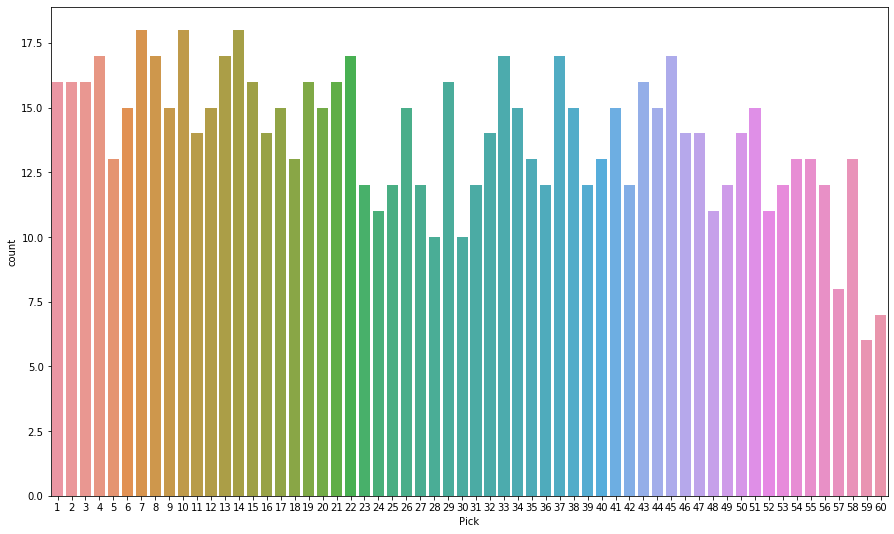

In [67]:
dims = (15,9)
fig, ax = plt.subplots(figsize=dims)
sns.countplot(x=players_data['Pick'])

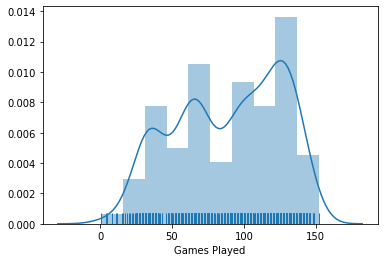

In [71]:
sns.distplot(players_data['Games Played'],rug=True,bins=10)

In [81]:
players_data['Games Played'].describe()

count    835.000000
mean      89.165269
std       36.607013
min        1.000000
25%       62.000000
50%       95.000000
75%      123.000000
max      152.000000
Name: Games Played, dtype: float64

Players with less games -> bad for the data. 
one season -> 38games, some are one and done
Mean at 89, std at 86, so we dont have many outliers. And Logistic regression anyway is insensitive to outliers, so we're going to let it 

In [83]:
players_data.columns

Index(['Pick', 'Name', 'Year', 'Games Played', 'Minutes Per Game',
       'FGs per game', 'Three point attempts', 'Threes per game',
       'Free Throws per game', 'Rebounds per game', 'Assists per game',
       'Steals per game', 'Blocks per game', 'Turnovers per game',
       'Points per game', 'Position', 'NBA Success?'],
      dtype='object')

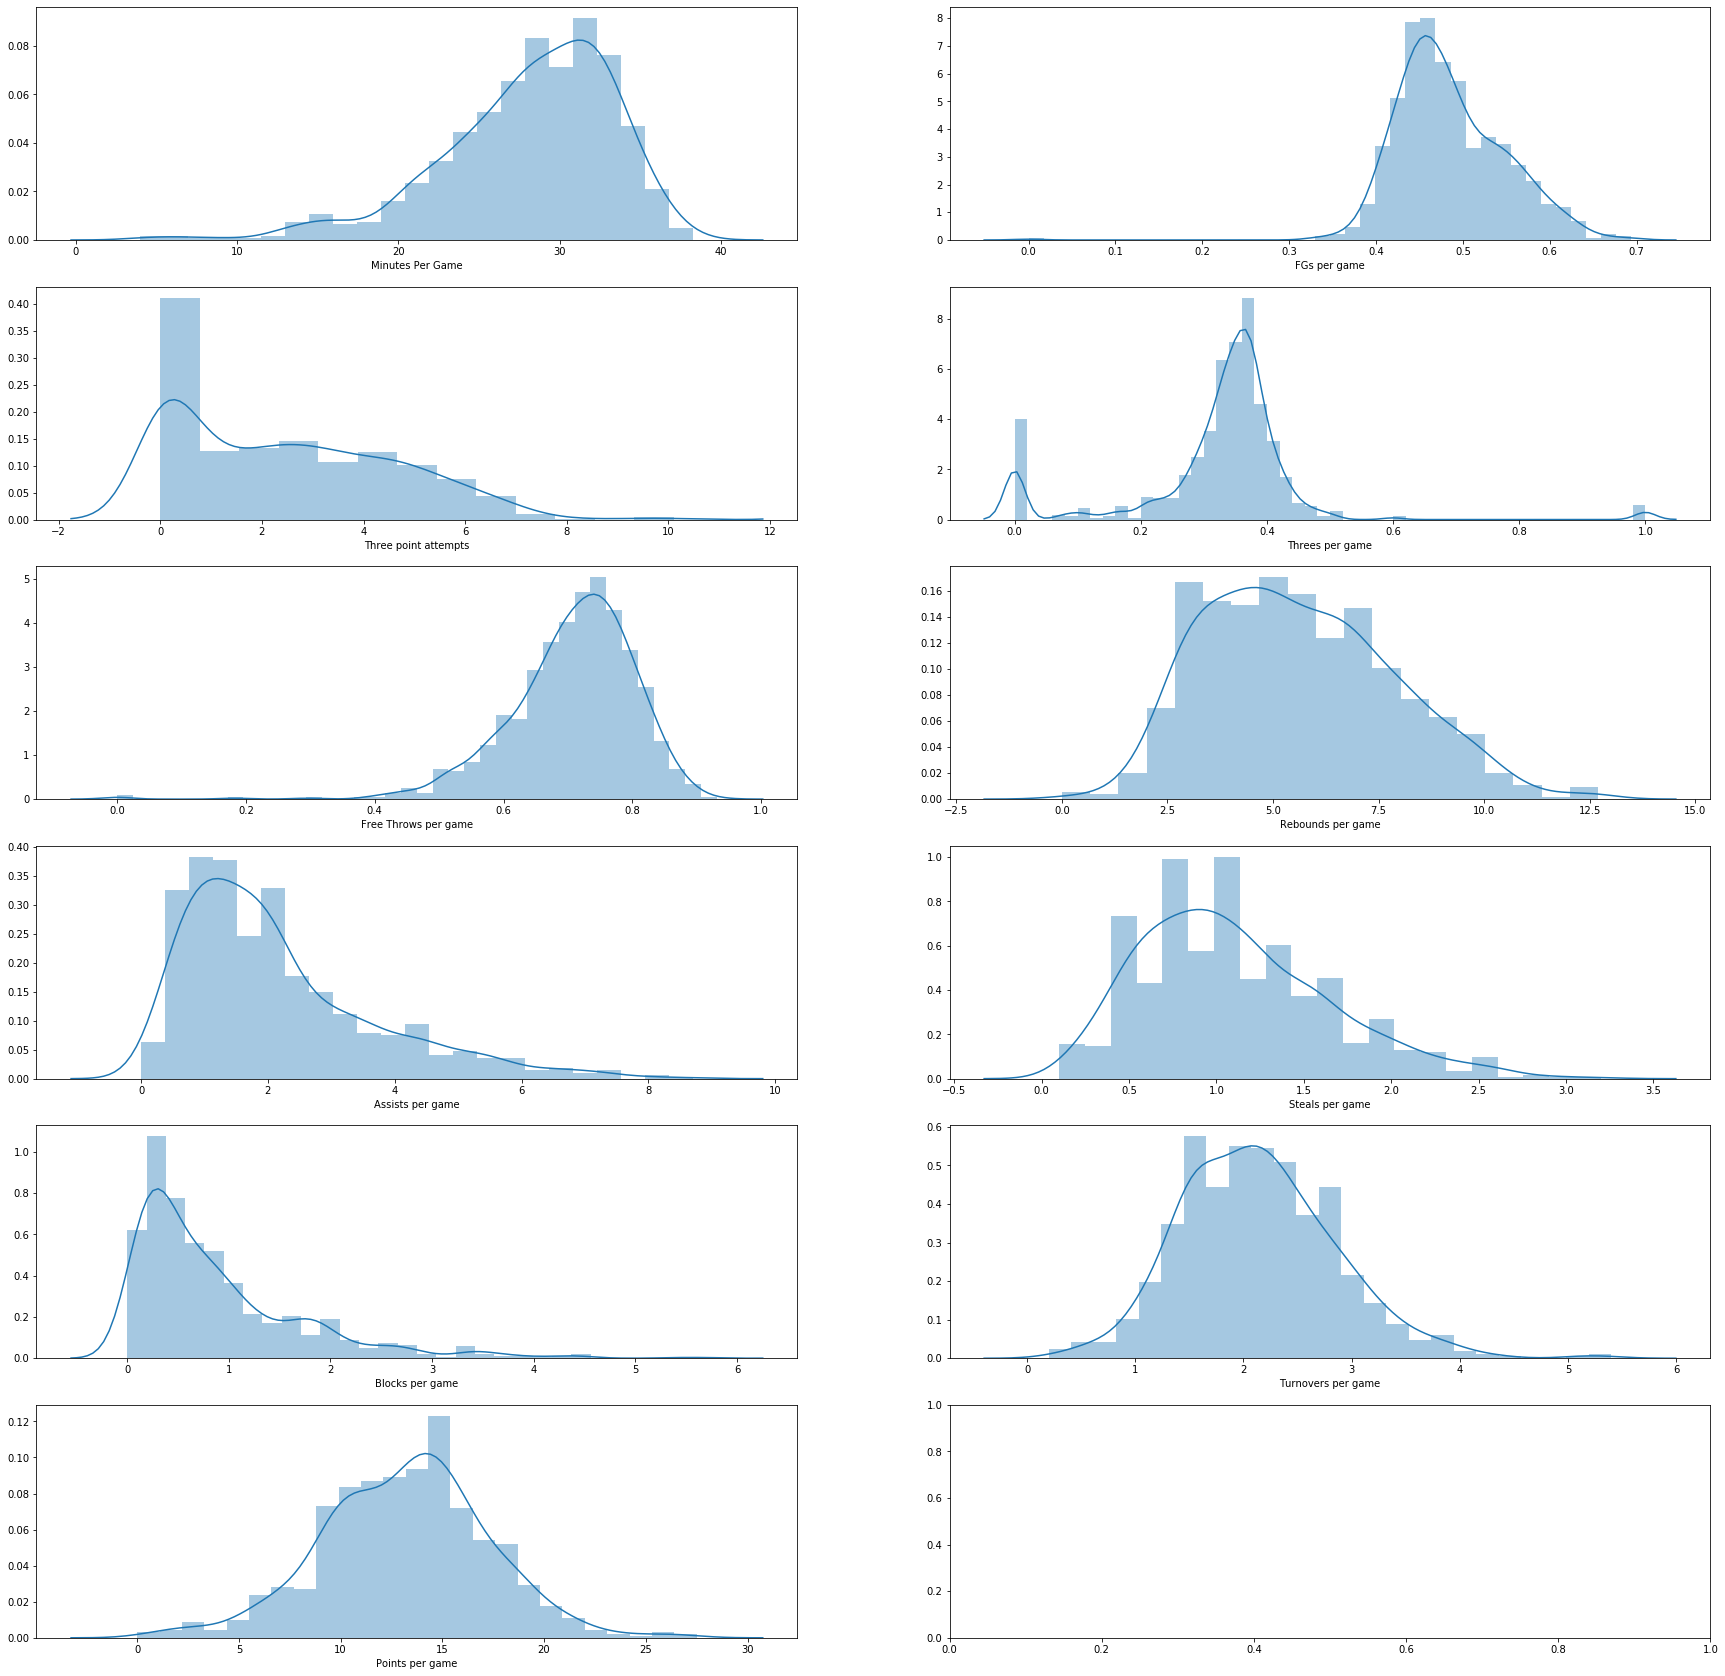

In [133]:

fig,axes = plt.subplots(nrows=6,ncols=2,sharex=False,figsize=(30,30))
sns.distplot(players_data['Minutes Per Game'].dropna(),ax=axes[0,0])
sns.distplot(players_data['FGs per game'].dropna(),ax=axes[0,1])
sns.distplot(players_data['Three point attempts'].dropna(),ax=axes[1,0])
sns.distplot(players_data['Threes per game'].dropna(),ax=axes[1,1])
sns.distplot(players_data['Free Throws per game'].dropna(),ax=axes[2,0])
sns.distplot(players_data['Rebounds per game'].dropna(),ax=axes[2,1])
sns.distplot(players_data['Assists per game'].dropna(),ax=axes[3,0])
sns.distplot(players_data['Steals per game'].dropna(),ax=axes[3,1])
sns.distplot(players_data['Blocks per game'].dropna(),ax=axes[4,0])
sns.distplot(players_data['Turnovers per game'].dropna(),ax=axes[4,1])
sns.distplot(players_data['Points per game'].dropna(),ax=axes[5,0])

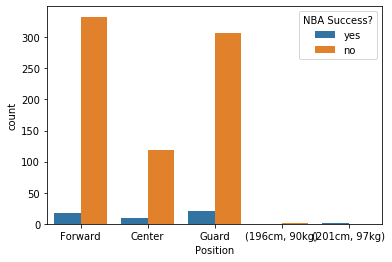

In [162]:
sns.countplot(players_data['Position'],hue=players_data['NBA Success?'])